In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

import DAQSimulator
import EventGenerator
import LAPPDStation

#plt.style.use("~/evanstyle.mplstyle")

In [2]:
egen = EventGenerator.EventGenerator("configs/example.yml")
eLAPPD1 = LAPPDStation.LAPPDStation("configs/example.yml")

In [3]:
egen.generate_particle_times(100)
eLAPPD1.generate_noise_times(100)
eLAPPD1.reconcile_times(egen, 100)

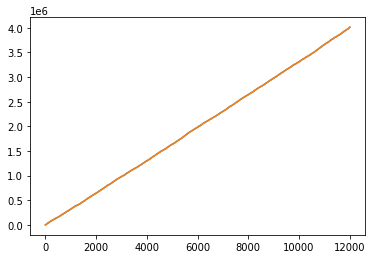

In [4]:
plt.plot(eLAPPD1.allTimes[0])
plt.plot(eLAPPD1.allDeadTimes[0])

In [5]:
eventsPassingTrigger = 0
eventsPassingTriggerAndSaved = 0
for i in range(100):
    eventsPassingTrigger += np.count_nonzero((eLAPPD1.eventClass[i] == 1) & eLAPPD1.passTrigger[i])
    eventsPassingTriggerAndSaved += np.count_nonzero((eLAPPD1.eventClass[i] == 1) & eLAPPD1.passTrigger[i] & eLAPPD1.acceptMasks[i])
print("Events saved:", eventsPassingTriggerAndSaved, "/", eventsPassingTrigger, "=", float(eventsPassingTriggerAndSaved)/eventsPassingTrigger)

Events saved: 824622 / 1000000 = 0.824622
